**Assignment-1**
**Classifying IMDB Movie Reviews:Using Neural Networks**

The "IMDB dataset" will be used in this assignment, and the goal is to classify movie reviews as positive or negative. The Internet Movie Database provided 50,000 highly polarized reviews for this dataset. They are divided into 25,000 reviews for training and 25,000 reviews for testing, with each set consisting of 50 percent negative and 50 percent positive feedback.

In [85]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In the code, "num_words=10000" is added.In order to have a more manageable data size, we will only use the top 10,000 most common words

**Train Dataset**

In [86]:
train_data



array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [87]:
train_labels[0]

1

In [88]:
len(train_labels)

25000

In [89]:
max([max(sequence) for sequence in train_data])

9999

**Test Dataset**

In [90]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [91]:
test_labels[0]

0

In [92]:
max([max(sequence) for sequence in test_data])

9999

In train_data and test_data, we have lists of reviews, where each review contains word indices (encoding words).Test_labels and train_labels are lists of 0s and 1s, where 0 represents "negative" and 1 represents "positive."

**Decoding reviews back to text**



Here, in this section we can see that integers can be decoded to reviews(Words)

In [93]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [94]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Data Preparation**

We have to change our reviews from characters into tensors.
Using one-hot encoding, we could convert our lists into vectors of 0s and 1s.For instance, this would mean transforming the sequence [3, 5] into a 10,000-dimensional vector in which all indices are zeros except for three and five, which are ones.Then we could use a Dense layer as the first layer in our network, capable of handling floating point vectors
The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension).

In [95]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Data Vectorization

In [96]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [97]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [98]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

Label Vectorization

In [99]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Neural Network with 2-Hidden Layers**

**Building Model using Relu function**

Now we have 2D tensors of shape to represent our input data (samples, 10,000).In our case, the output is a scalar, either 0 or 1.With these types of problems, fully connected layers (layes.dense) with relu activation functions work well.

In [100]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the Model**

In model compilation we have Three parameters.They are

Loss function: Calculates a distance score from the network predictions and the real targets

Optimizer: Loss score is used as a feedback signal to adjust weights in order to lower loss score, which is done by an optimizer

Metrics: Evaluates the performance during training & testing.

In [101]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validation of the approach**

We need to create a validation set to verify the training set's performance.

In [102]:
seed(123)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the Model**

Here, we will train our model for 20 epochs with batch size of 512 samples and also we will record loss and accuracy.

In [103]:
seed(123)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4929 - accuracy: 0.7965 - val_loss: 0.3842 - val_accuracy: 0.8616
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2942 - accuracy: 0.9087 - val_loss: 0.3097 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2190 - accuracy: 0.9279 - val_loss: 0.2775 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1731 - accuracy: 0.9429 - val_loss: 0.2748 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1392 - accuracy: 0.9567 - val_loss: 0.2811 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1153 - accuracy: 0.9651 - val_loss: 0.2927 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0925 - accuracy: 0.9746 - val_loss: 0.3713 - val_accuracy: 0.8660
Epoch 8/20
30

**OBSERVATIONS:**

The loss and accuracy on the training were 0.0059 and 99% respectively. Regarding the loss and accuracy on the validation set were 0.68 and 86.8%.

The History object is a dictionary containing all data about the training process.

In [104]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the Training and Validation loss**

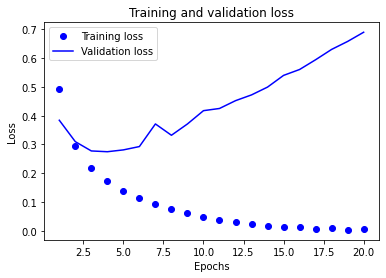

In [105]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the Training and Validation accuracy**

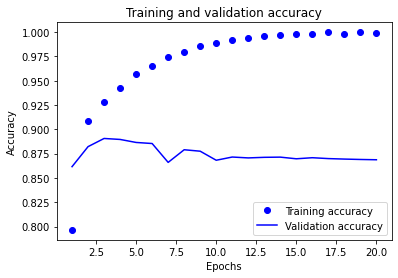

In [106]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Observations**: According to the above graph, validation loss tends to increase after the 4th epoch, which indicates overfitting.

Let's build the model again from scratch, then evaluate it against the test set.

**Retraining the model from scratch**

In [107]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4457 - accuracy: 0.8170
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2525 - accuracy: 0.9122
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1949 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3012 - accuracy: 0.8830


In [108]:
results

[0.30120524764060974, 0.8830400109291077]

The results display accuracy and loss of the test set as 0.30 and 88.30% respectively

Predicting the model on New dataset



In [109]:
model.predict(x_test)

array([[0.24289182],
       [0.9999658 ],
       [0.9169464 ],
       ...,
       [0.14988157],
       [0.07950532],
       [0.75520325]], dtype=float32)

**Neural Network with 1-Hidden Layer**

Here,we are building the neural network with one layer and everything will be same as the previous 2-layer neural network.

In [110]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4937 - accuracy: 0.7880 - val_loss: 0.3820 - val_accuracy: 0.8673
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3066 - accuracy: 0.9042 - val_loss: 0.3288 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2393 - accuracy: 0.9249 - val_loss: 0.2875 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1943 - accuracy: 0.9412 - val_loss: 0.2775 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1659 - accuracy: 0.9490 - val_loss: 0.2790 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1423 - accuracy: 0.9565 - val_loss: 0.2872 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1234 - accuracy: 0.9646 - val_loss: 0.2924 - val_accuracy: 0.8848
Epoch 8/20
30

In [111]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

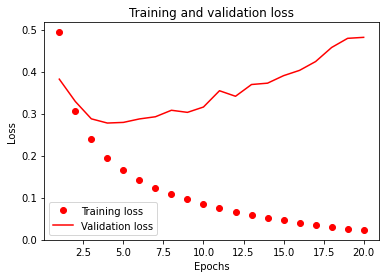

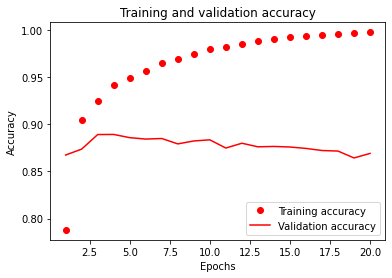

In [112]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 Retraining the model

In [113]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 12ms/step - loss: 0.4477 - accuracy: 0.8320
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.2793 - accuracy: 0.9062
Epoch 3/5
49/49 [==============================] - 1s 12ms/step - loss: 0.2204 - accuracy: 0.9256
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 0.1882 - accuracy: 0.9353
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2932 - accuracy: 0.8819


In [114]:
results1

[0.29316866397857666, 0.881879985332489]

The results display accuracy and loss of the test set as 0.28 and 88.49% respectively

In [115]:
model1.predict(x_test)

array([[0.14623237],
       [0.9997661 ],
       [0.6924913 ],
       ...,
       [0.09286991],
       [0.05921036],
       [0.4118243 ]], dtype=float32)

**Neural Network with 3-Hidden Layers**

Here,we are building the neural network with three layers and everything will be same as 2-layer neural network.

In [116]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5330 - accuracy: 0.7537 - val_loss: 0.3901 - val_accuracy: 0.8582
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3022 - accuracy: 0.9011 - val_loss: 0.3189 - val_accuracy: 0.8759
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2145 - accuracy: 0.9299 - val_loss: 0.3158 - val_accuracy: 0.8745
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1635 - accuracy: 0.9448 - val_loss: 0.2919 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1335 - accuracy: 0.9562 - val_loss: 0.3232 - val_accuracy: 0.8763
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1063 - accuracy: 0.9663 - val_loss: 0.3300 - val_accuracy: 0.8779
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0846 - accuracy: 0.9755 - val_loss: 0.3614 - val_accuracy: 0.8738
Epoch 8/20
30

In [117]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

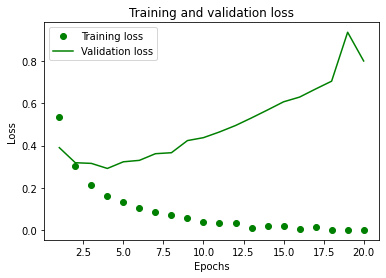

In [118]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

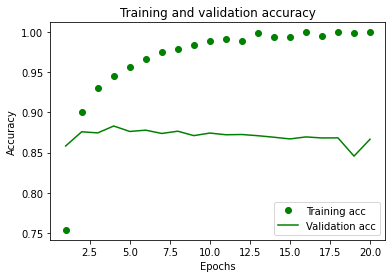

In [119]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [120]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 12ms/step - loss: 0.4631 - accuracy: 0.8141
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2588 - accuracy: 0.9046
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2814 - accuracy: 0.8881


In [121]:
results_3

[0.28139135241508484, 0.8880800008773804]

The results display accuracy and loss of the test set as 0.28 and 88.8% respectively

In [122]:
model_3.predict(x_test)

array([[0.24235305],
       [0.9986923 ],
       [0.9298434 ],
       ...,
       [0.16059542],
       [0.13164154],
       [0.49691132]], dtype=float32)

By changing the number of layers, the accuracy of the model does not improve much. The model using three layers, however, shows a better accuracy compared to the other two.

You must choose the number of units in the hidden layers when determining the overall architecture of your neural network.Although these layers do not directly interact with the external environment, they have a significant impact on the final result.Each hidden layer must be carefully considered in terms of both its number of units and its number of hidden layers.

Let's try using layers with more hidden units or fewer hidden units: 32 units, 64 and 128 units to validate the results

From here we will be using the 2-layers and find ways to improve the performance of the model.

**Building the Neural Network with 32-Units**

In [123]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#compiling the model
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Model fit
np.random.seed(123)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4965 - accuracy: 0.7785 - val_loss: 0.3656 - val_accuracy: 0.8659
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2823 - accuracy: 0.9057 - val_loss: 0.2854 - val_accuracy: 0.8927
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2060 - accuracy: 0.9292 - val_loss: 0.2943 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1568 - accuracy: 0.9477 - val_loss: 0.2807 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1310 - accuracy: 0.9554 - val_loss: 0.2913 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0949 - accuracy: 0.9715 - val_loss: 0.3126 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0819 - accuracy: 0.9747 - val_loss: 0.3433 - val_accuracy: 0.8813
Epoch 8/20
30

In [124]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation Loss

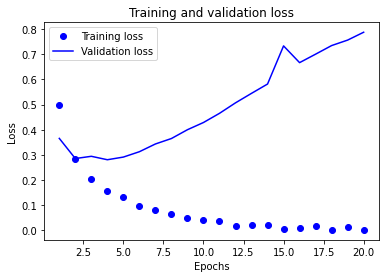

In [125]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

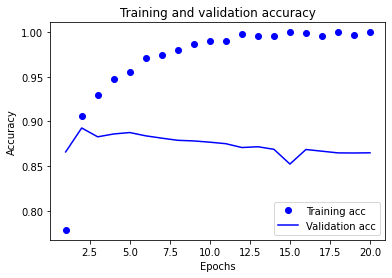

In [126]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 [==============================] - 1s 15ms/step - loss: 0.2252 - accuracy: 0.9440
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.1281 - accuracy: 0.9608
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.4616 - accuracy: 0.8614


[0.4615730047225952, 0.8613600134849548]

In [128]:
model_32.predict(x_test)

array([[0.0127261 ],
       [0.99998665],
       [0.9728122 ],
       ...,
       [0.08829135],
       [0.06073213],
       [0.7600264 ]], dtype=float32)

**Training the model with 64-Units**

In [129]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.4832 - accuracy: 0.7731 - val_loss: 0.3185 - val_accuracy: 0.8815
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2609 - accuracy: 0.9027 - val_loss: 0.2855 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1921 - accuracy: 0.9280 - val_loss: 0.2780 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1396 - accuracy: 0.9495 - val_loss: 0.3232 - val_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1012 - accuracy: 0.9650 - val_loss: 0.5786 - val_accuracy: 0.8219
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0833 - accuracy: 0.9714 - val_loss: 0.3463 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0688 - accuracy: 0.9793 - val_loss: 0.3751 - val_accuracy: 0.8838
Epoch 8/20
30

In [130]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation Loss

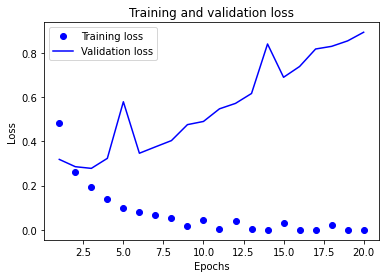

In [131]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

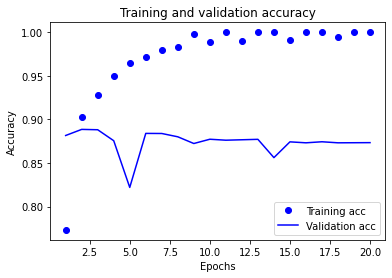

In [132]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [133]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 [==============================] - 1s 22ms/step - loss: 0.2218 - accuracy: 0.9455
Epoch 2/3
49/49 [==============================] - 1s 22ms/step - loss: 0.1001 - accuracy: 0.9686
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.5171 - accuracy: 0.8642


[0.5170963406562805, 0.8641600012779236]

In [134]:
model_64.predict(x_test)

array([[0.0159097 ],
       [1.        ],
       [0.9999905 ],
       ...,
       [0.0738408 ],
       [0.02603778],
       [0.8346243 ]], dtype=float32)

**Training the model with 128-Units**

In [135]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.4905 - accuracy: 0.7853 - val_loss: 0.3150 - val_accuracy: 0.8813
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2589 - accuracy: 0.9027 - val_loss: 0.3860 - val_accuracy: 0.8459
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1766 - accuracy: 0.9323 - val_loss: 0.2878 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1443 - accuracy: 0.9459 - val_loss: 0.3024 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0833 - accuracy: 0.9729 - val_loss: 0.3402 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0599 - accuracy: 0.9801 - val_loss: 0.3925 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.3889 - val_accuracy: 0.8823
Epoch 8/20
30

In [136]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

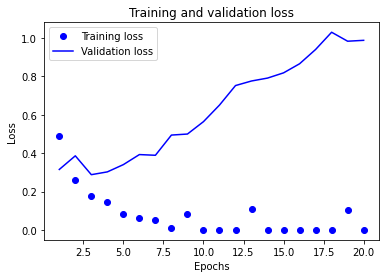

In [137]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

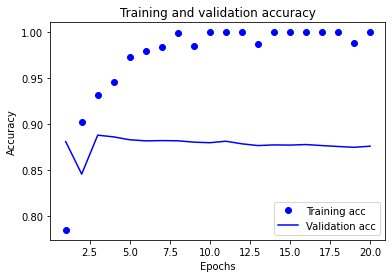

In [138]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [139]:
history_128 = model_128.fit(x_train, y_train, epochs=2, batch_size=512)
results_128 = model_128.evaluate(x_test, y_test)
results_128

Epoch 1/2
49/49 [==============================] - 2s 32ms/step - loss: 0.1932 - accuracy: 0.9476
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.4232 - accuracy: 0.8720


[0.42320406436920166, 0.871999979019165]

In [140]:
model_128.predict(x_test)

array([[0.025334  ],
       [1.        ],
       [0.9999443 ],
       ...,
       [0.06409588],
       [0.02785847],
       [0.8473625 ]], dtype=float32)

**Observations:**

-> For 32-units,the accuracy on the validation set is 86.13%.

-> For 64-units,the accuracy on the validation set is 86.41%.

-> For 128-units,the accuracy on the validation set is 87.19%.It seems like increasing the number of units the model performance's tends to increase.

**Neural Network with MSE Loss Function**

The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.The mean squared error loss function can be used in Keras by specifying ‘mse‘ or ‘mean_squared_error‘ as the loss function when compiling the model.

Let's try to use MSE loss function instead of binary_crossentropy loss function and check results

In [141]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1846 - accuracy: 0.7756 - val_loss: 0.1303 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1018 - accuracy: 0.8975 - val_loss: 0.0995 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0723 - accuracy: 0.9243 - val_loss: 0.0881 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0548 - accuracy: 0.9439 - val_loss: 0.0890 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0442 - accuracy: 0.9542 - val_loss: 0.0853 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0361 - accuracy: 0.9649 - val_loss: 0.0827 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0287 - accuracy: 0.9732 - val_loss: 0.0844 - val_accuracy: 0.8862
Epoch 8/20
30

In [142]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

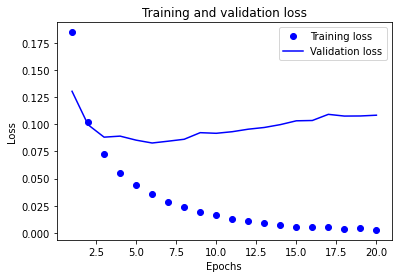

In [143]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

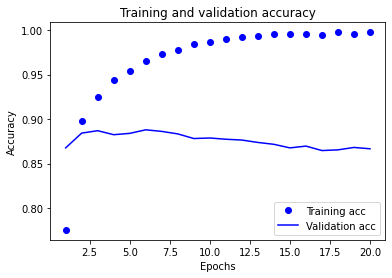

In [144]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [145]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0447 - accuracy: 0.9467
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0325 - accuracy: 0.9629
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0260 - accuracy: 0.9714
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0217 - accuracy: 0.9773
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0186 - accuracy: 0.9812
Epoch 6/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0162 - accuracy: 0.9834
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0139 - accuracy: 0.9861
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1177 - accuracy: 0.8590


[0.11767461150884628, 0.8590400218963623]

In [146]:
model_MSE.predict(x_test)

array([[9.4428658e-04],
       [9.9998510e-01],
       [9.8560226e-01],
       ...,
       [5.7458371e-02],
       [2.0643771e-03],
       [9.4083512e-01]], dtype=float32)

**Observations:**

First of all, cross-entropy (or softmax loss, but cross-entropy is more effective) is a better measure for classification than MSE, since the decision boundary in a classification task is large when compared with regression.Despite being non-satisfactory for misclassifications, MSE is relevant for regressions with small distances between predictable values.

Here, I find no real difference between the two functions, but Binarycross entropy shows slightly better accuracy.

**Neural Network using Tanh Activation Function** 

Tanh is also a very common activation function.Due to its nonlinear nature, it is bound to the range (-1, 1).In tanh, the gradient is stronger than in sigmoid.

Let's try to use tanh activation function instead of relu activation function and validate the results

In [147]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4721 - accuracy: 0.8043 - val_loss: 0.3617 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2725 - accuracy: 0.9072 - val_loss: 0.3176 - val_accuracy: 0.8639
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1935 - accuracy: 0.9343 - val_loss: 0.2709 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1450 - accuracy: 0.9502 - val_loss: 0.3251 - val_accuracy: 0.8713
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1144 - accuracy: 0.9617 - val_loss: 0.3270 - val_accuracy: 0.8785
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0856 - accuracy: 0.9732 - val_loss: 0.3357 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0681 - accuracy: 0.9787 - val_loss: 0.3747 - val_accuracy: 0.8799
Epoch 8/20
30

In [148]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

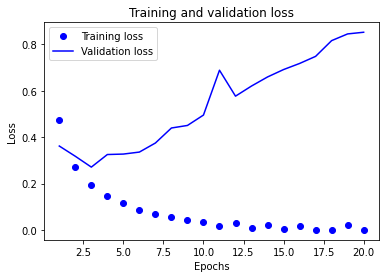

In [149]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

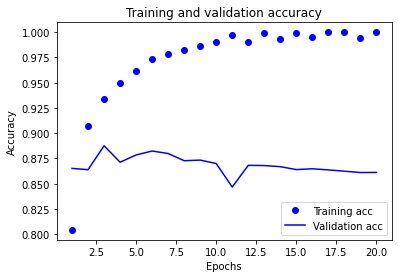

In [150]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [151]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 14ms/step - loss: 0.3159 - accuracy: 0.9438
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1609 - accuracy: 0.9618
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1168 - accuracy: 0.9673
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0969 - accuracy: 0.9712
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0789 - accuracy: 0.9764
Epoch 6/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0568 - accuracy: 0.9825
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.8407


[0.69157874584198, 0.840719997882843]


**Observations:**

In comparison to the sigmoid and TanH, ReLu is now the best and most advanced activation function since it totally eliminates limitations like the Vanishing Gradient Problem, making it more sophisticated than other activation functions.

Model performance utilizing relu activation is good, as can be observed when the two activations are used and compared.

**Neural Network using Adam optimiser Function**

In [152]:
np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5948 - accuracy: 0.7301 - val_loss: 0.4494 - val_accuracy: 0.8485
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3371 - accuracy: 0.8889 - val_loss: 0.3111 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2207 - accuracy: 0.9275 - val_loss: 0.2790 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1652 - accuracy: 0.9480 - val_loss: 0.2840 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1278 - accuracy: 0.9629 - val_loss: 0.2898 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1010 - accuracy: 0.9732 - val_loss: 0.3049 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0792 - accuracy: 0.9823 - val_loss: 0.3294 - val_accuracy: 0.8815
Epoch 8/20
30

In [153]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

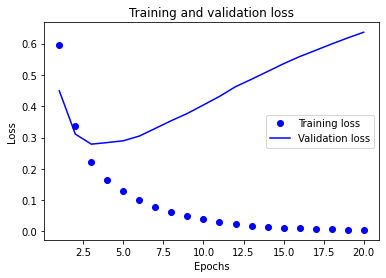

In [154]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

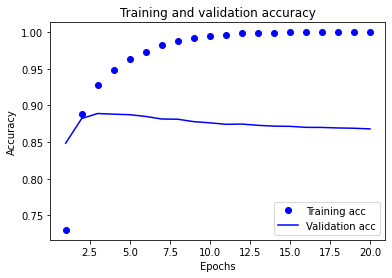

In [155]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [173]:
model_adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = model_adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 4.6818e-04 - accuracy: 1.0000
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 4.1983e-04 - accuracy: 1.0000
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 3.7981e-04 - accuracy: 1.0000
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 1.4027 - accuracy: 0.8490


[1.4026676416397095, 0.8489999771118164]

Adam is the best optimizer. Adam is the optimizer if one wishes to train the neural network more quickly and effectively. Utilize optimizers with a dynamic learning rate for sparse data. The best gradient descent algorithm to utilize is minimum-batch gradient descent.

**Regularization**


Regularization is the process of modulating the quantity of information a model is allowed to store or add. The most commonly used regularizers are Lasso (L2) and Ridge (L1).


In [174]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5407 - accuracy: 0.7967 - val_loss: 0.4184 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3522 - accuracy: 0.9001 - val_loss: 0.3555 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2830 - accuracy: 0.9230 - val_loss: 0.3335 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2456 - accuracy: 0.9357 - val_loss: 0.3294 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2261 - accuracy: 0.9429 - val_loss: 0.3315 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2120 - accuracy: 0.9479 - val_loss: 0.3396 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1996 - accuracy: 0.9527 - val_loss: 0.3919 - val_accuracy: 0.8676
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

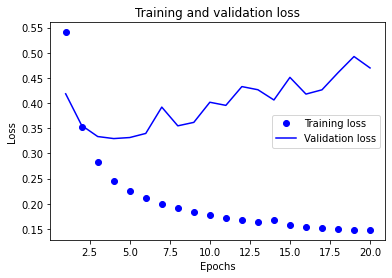

In [175]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

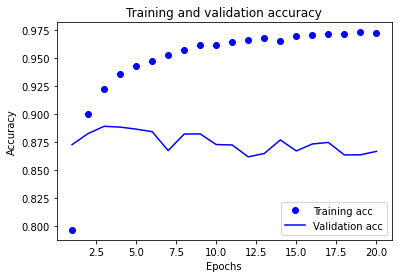

In [176]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [177]:
model_regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 [==============================] - 1s 13ms/step - loss: 0.2544 - accuracy: 0.9346
Epoch 2/8
49/49 [==============================] - 1s 13ms/step - loss: 0.2213 - accuracy: 0.9408
Epoch 3/8
49/49 [==============================] - 1s 13ms/step - loss: 0.2048 - accuracy: 0.9464
Epoch 4/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1974 - accuracy: 0.9485
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1938 - accuracy: 0.9495
Epoch 6/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1895 - accuracy: 0.9511
Epoch 7/8
49/49 [==============================] - 1s 15ms/step - loss: 0.1841 - accuracy: 0.9546
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.8570


[0.47265297174453735, 0.8569999933242798]

The results display accuracy and loss of the test set as 0.47 and 85.69% respectively

**Dropout**

A Simple Way to Prevent Neural Network from Overfitting.In training, the dropout layer's outputs are randomly subsampled, resulting in a reduction in capacity or thinning of the network.The use of dropout may require a wider network, e.g. more nodes.A dropout regularization approach can be viewed as generic.Dropout is most effective when there is a limited amount of training data and the model is likely to overfit.

In [161]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6540 - accuracy: 0.6098 - val_loss: 0.5629 - val_accuracy: 0.8185
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5558 - accuracy: 0.7327 - val_loss: 0.4578 - val_accuracy: 0.8633
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4790 - accuracy: 0.7931 - val_loss: 0.3953 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4177 - accuracy: 0.8357 - val_loss: 0.3388 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3659 - accuracy: 0.8587 - val_loss: 0.3091 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3252 - accuracy: 0.8786 - val_loss: 0.2875 - val_accuracy: 0.8914
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2927 - accuracy: 0.8969 - val_loss: 0.2732 - val_accuracy: 0.8937
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

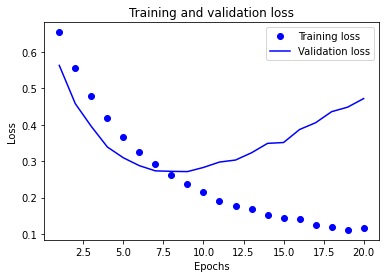

In [162]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

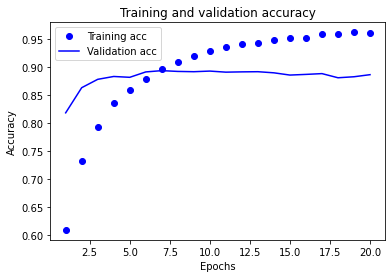

In [163]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [164]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 13ms/step - loss: 0.2666 - accuracy: 0.9187
Epoch 2/8
49/49 [==============================] - 1s 13ms/step - loss: 0.2277 - accuracy: 0.9259
Epoch 3/8
49/49 [==============================] - 1s 13ms/step - loss: 0.2008 - accuracy: 0.9323
Epoch 4/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1885 - accuracy: 0.9386
Epoch 5/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1791 - accuracy: 0.9388
Epoch 6/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1771 - accuracy: 0.9402
Epoch 7/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1587 - accuracy: 0.9452
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.8722


[0.4423696994781494, 0.872160017490387]

The results display accuracy and loss of the test set as 0.44 and 87.21% respectively

Training the Model with Hypertunned Parameters

In [165]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.2422 - accuracy: 0.5902 - val_loss: 0.1960 - val_accuracy: 0.8124
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1873 - accuracy: 0.7503 - val_loss: 0.1421 - val_accuracy: 0.8435
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1439 - accuracy: 0.8343 - val_loss: 0.1074 - val_accuracy: 0.8713
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1151 - accuracy: 0.8775 - val_loss: 0.0959 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0961 - accuracy: 0.9067 - val_loss: 0.0954 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0820 - accuracy: 0.9195 - val_loss: 0.0950 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0712 - accuracy: 0.9347 - val_loss: 0.0995 - val_accuracy: 0.8850
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

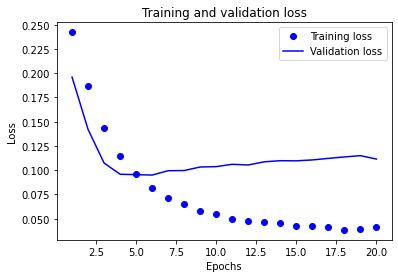

In [166]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation Accuracy

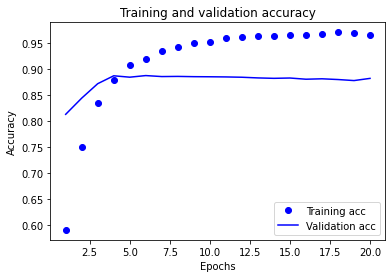

In [167]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [168]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0733 - accuracy: 0.9258
Epoch 2/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0668 - accuracy: 0.9334
Epoch 3/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0628 - accuracy: 0.9382
Epoch 4/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0595 - accuracy: 0.9416
Epoch 5/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0579 - accuracy: 0.9445
Epoch 6/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0552 - accuracy: 0.9471
Epoch 7/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0543 - accuracy: 0.9487
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1136 - accuracy: 0.8744


[0.11364694684743881, 0.8744000196456909]

**Summary of All the Models**

In [178]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()


<Figure size 432x288 with 0 Axes>

**Comparing all the models using Graph**

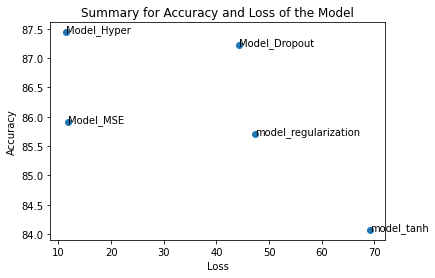

In [179]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

**Conclusion:**

Based on the graph, we can conclude that Maximum accuracy and loss were achieved with Model_Hyper.Three thick layers were used (32,32,16), each with a drop out rate of 0.5.With MSE, we observe that the model's MSE loss is negligible compared to any other model (other than Final Hypertuned Model).

We observe that accuracy changes very little as we raise the unit from 16, 32, 64, 128, while the loss function decreases.

Hidden Layers:Increasing the number of hidden layers from 1 to 3 did not affect loss function accuracy or deflection

Loss Function: Using "mse" as the loss function for the IMDB dataset, the loss value is minimal when compared to binary cross entropy.

Activation Function: Due to the vanishing gradient problem, the model's tanh activation function has a low accuracy.

Optimiser Function: Using Adam as an Optimiser we can compute the model more efficiently.

Regularization: In comparison to the initial model, regularization results in much smaller losses and less overfitting, with the L-2 model showing somewhat better accuracy.

Dropout: Dropout also reduces the loss function, but does not affect the accuracy.
